<a href="https://colab.research.google.com/github/meharinhasna/-Profit-Prediction-using-Multiple-Linear-Regression-/blob/main/Profit_Prediction_using_Multiple_Linear_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
# import library
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
# importing dataset
data = pd.read_csv('/content/Profit Prediction using Linear Regression.csv')

In [55]:
data.head(10)

,Marketing Spend,Administration,Transport,Area,Profit
0,114523.61,136897.80,471784.10,Dhaka,192261.83
1,162597.70,151377.59,443898.53,Ctg,191792.06
2,153441.51,101145.55,407934.54,Rangpur,191050.39
3,144372.41,118671.85,383199.62,Dhaka,182901.99
4,142107.34,91391.77,366168.42,Rangpur,166187.94
5,131876.90,99814.71,362861.36,Dhaka,156991.12
6,134615.46,147198.87,127716.82,Ctg,156122.51
7,130298.13,145530.06,323876.68,Rangpur,155752.60
8,120542.52,148718.95,311613.29,Dhaka,152211.77
9,123334.88,108679.17,304981.62,Ctg,149759.96


<Axes: >

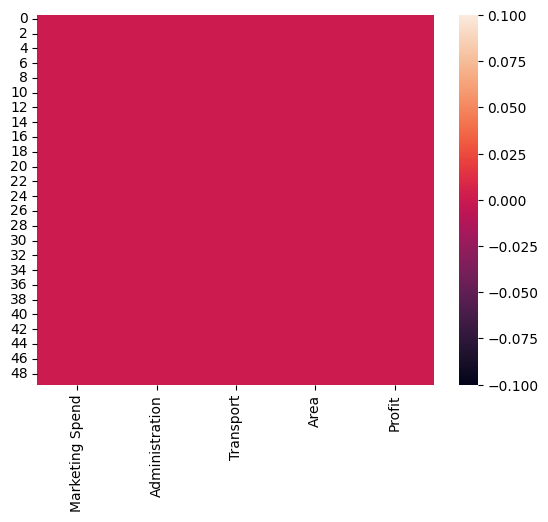

In [56]:
# check isnull value
sns.heatmap(data.isnull())

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Marketing Spend  50 non-null     float64
 1   Administration   50 non-null     float64
 2   Transport        50 non-null     float64
 3   Area             50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [58]:
data.describe()

,Marketing Spend,Administration,Transport,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [59]:
data.columns

Index(['Marketing Spend', 'Administration', 'Transport', 'Area', 'Profit'], dtype='object')

In [60]:
x = data.drop(['Profit'],axis=1)

In [61]:
y=data[['Profit']]

In [62]:
#Area convert to categorical columns
City = pd.get_dummies(x['Area'],drop_first=True)

In [63]:
#area columns drop
x=x.drop('Area',axis=1)

In [65]:
x=pd.concat([x,City],axis=1)

In [67]:
x.head()

,Marketing Spend,Administration,Transport,Dhaka,Rangpur
0,114523.61,136897.80,471784.10,True,False
1,162597.70,151377.59,443898.53,False,False
2,153441.51,101145.55,407934.54,False,True
3,144372.41,118671.85,383199.62,True,False
4,142107.34,91391.77,366168.42,False,True


In [76]:
# importing library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [71]:
x_train,x_test,y_train,y_test = train_test_split (x,y,test_size=0.2,random_state=0)

In [72]:
model = LinearRegression()

In [73]:
model.fit(x_train,y_train)

LinearRegression()

In [74]:
y_pred = model.predict(x_test)

In [75]:
y_pred

array([[103041.93019584],
       [128255.24514289],
       [126922.75723244],
       [ 71221.31157266],
       [173705.4106333 ],
       [124824.61560479],
       [ 70488.40325151],
       [ 98535.73506129],
       [116684.02101869],
       [161845.22370375]])

In [77]:
r2_score(y_test,y_pred)

0.8798164664885627

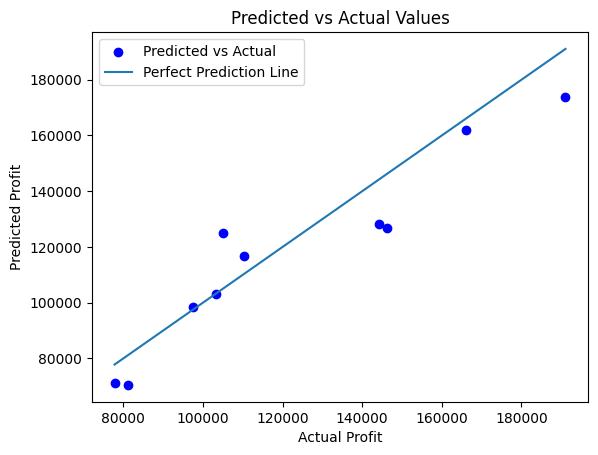

In [79]:
plt.plot(figsize = (10,6))
plt.scatter(y_test , y_pred , color ='blue' , label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], label='Perfect Prediction Line')
plt.title('Predicted vs Actual Values')
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.legend()

In [89]:
# input value for futuer profit prediction
pred_data = [[234745.56,225349.20,0,0,0]]

In [90]:
predict_data = model.predict(pred_data)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [92]:
print('prediction futuer profit:',predict_data)

prediction futuer profit: [[208488.153004]]
